In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from skimage.io import imshow
import matplotlib.image as mpimg
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data


In [ ]:
print (faces.keys())
print (faces.images.shape)
print (faces.data.shape)
print (faces.target.shape)

dict_keys(['data', 'images', 'target', 'DESCR'])
(400, 64, 64)
(400, 4096)
(400,)


In [ ]:
print (np.max(faces.data))
print (np.min(faces.data))
print (np.mean(faces.data))

1.0
0.0
0.5470426


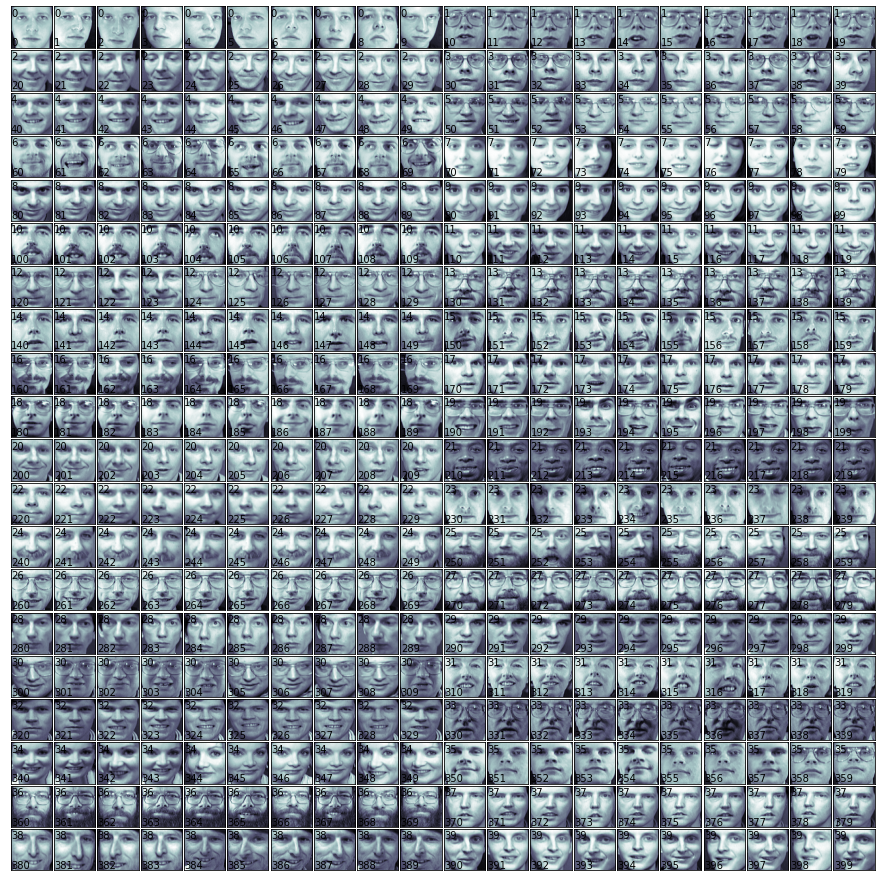

In [ ]:
def print_faces(images, target, top_n):
    # set up the figure size in inches
    fig = plt.figure(figsize=(12, 12))
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
    for i in range(top_n):
        # plot the images in a matrix of 20x20
        p = fig.add_subplot(20, 20, i + 1, xticks=[], yticks=[])
        p.imshow(images[i], cmap=plt.cm.bone)
        
        # label the image with the target value
        p.text(0, 14, str(target[i]))
        p.text(0, 60, str(i))

print_faces(faces.images, faces.target, 400)

In [ ]:
svc_1 = SVC(kernel='linear')
print (svc_1)

SVC(kernel='linear')


In [ ]:
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

SVC(decision_function_shape=None, gamma='auto', kernel='linear')

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.25, random_state=0)

In [ ]:
from sklearn import metrics
import seaborn as sns
from yellowbrick.classifier import ClassificationReport

def train_and_evaluate(clf, X_train, X_test, y_train, y_test,colour):
    
    clf.fit(X_train, y_train)
    
    print ("Accuracy on training set:")
    print (clf.score(X_train, y_train))
    print ("Accuracy on testing set:")
    print (clf.score(X_test, y_test))
    
    y_pred = clf.predict(X_test)
    
    print ("Classification Report:")
    print (metrics.classification_report(y_test, y_pred))
    print ("Confusion Matrix:")
    cm = metrics.confusion_matrix(y_test, y_pred)
    sns.heatmap(cm,cmap=colour)


Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      0.67      0.80         3
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         2
          13       1.00      1.00      1.00         3
          14       1.00      1.00      1.00         5
          15       1.00      1.00      1.00         3
          17       1.00      1.00      1.00         

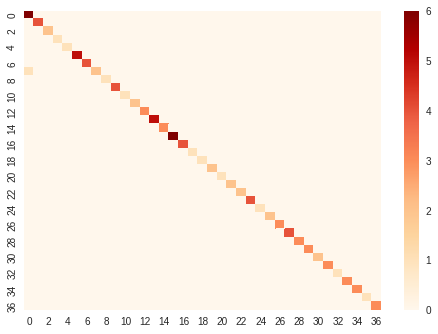

In [ ]:
train_and_evaluate(svc_1, X_train, X_test, y_train, y_test,"OrRd")

In [ ]:
# the index ranges of images of people with glasses
glasses = [
	(10, 19), (30, 32), (37, 38), (50, 59), (63, 64),
	(69, 69), (120, 121), (124, 129), (130, 139), (160, 161),
	(164, 169), (180, 182), (185, 185), (189, 189), (190, 192),
	(194, 194), (196, 199), (260, 269), (270, 279), (300, 309),
	(330, 339), (358, 359), (360, 369)
]

In [ ]:
def create_target(segments):
    # create a new y array of target size initialized with zeros
    y = np.zeros(faces.target.shape[0])
    # put 1 in the specified segments
    for (start, end) in segments:
        y[start:end + 1] = 1
    return y

In [ ]:
target_glasses = create_target(glasses)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(faces.data, target_glasses, test_size=0.25, random_state=0)

In [ ]:
#a  new SVC classifier 

svc_2 = SVC(kernel='linear')

Accuracy on training set:
1.0
Accuracy on testing set:
0.99
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99        67
         1.0       0.97      1.00      0.99        33

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100

Confusion Matrix:


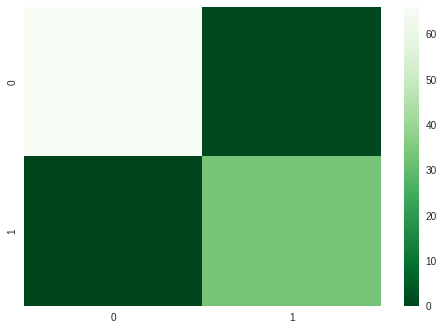

In [ ]:
train_and_evaluate(svc_2, X_train, X_test, y_train, y_test,"Greens_r")

In [ ]:
X_test = faces.data[30:40]
y_test = target_glasses[30:40]

print (y_test.shape[0])

select = np.ones(target_glasses.shape[0])
select[30:40] = 0
X_train = faces.data[select == 1]
y_train = target_glasses[select == 1]

print (y_train.shape[0])

10
390


In [ ]:
svc_3 = SVC(kernel='linear')

Accuracy on training set:
1.0
Accuracy on testing set:
0.9
Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      1.00      0.91         5
         1.0       1.00      0.80      0.89         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10

Confusion Matrix:


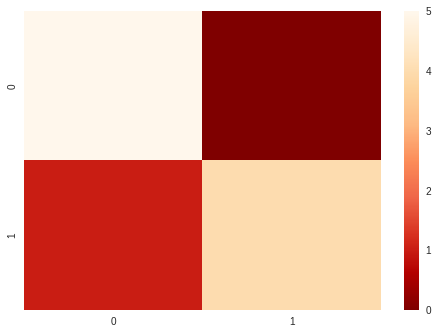

In [ ]:
train_and_evaluate(svc_3, X_train, X_test, y_train, y_test,"OrRd_r")

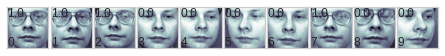

In [ ]:
y_pred = svc_3.predict(X_test)
eval_faces = [np.reshape(a, (64, 64)) for a in X_test]
print_faces(eval_faces, y_pred, 10)

In [ ]:
pca = PCA(100)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


print('Original dataset:',X_train.shape)
print('Dataset after applying PCA:',X_train_pca.shape)
print('No of PCs/Eigen Faces:',len(pca.components_))
print('Eigen Face Dimension:',pca.components_.shape)

Original dataset: (390, 4096)
Dataset after applying PCA: (390, 100)
No of PCs/Eigen Faces: 100
Eigen Face Dimension: (100, 4096)


Text(0.5, 1.0, 'Average Face')

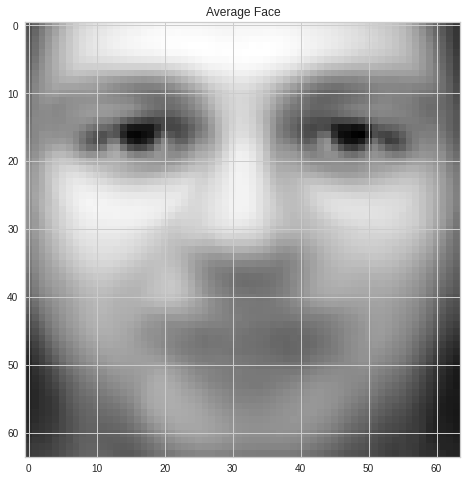

In [ ]:
# average face of the samples

plt.subplots(1,1,figsize=(8,8))
plt.imshow(pca.mean_.reshape((64,64)), cmap="gray")
plt.title('Average Face')

Text(0.5, 0.98, 'All Eigen Faces')

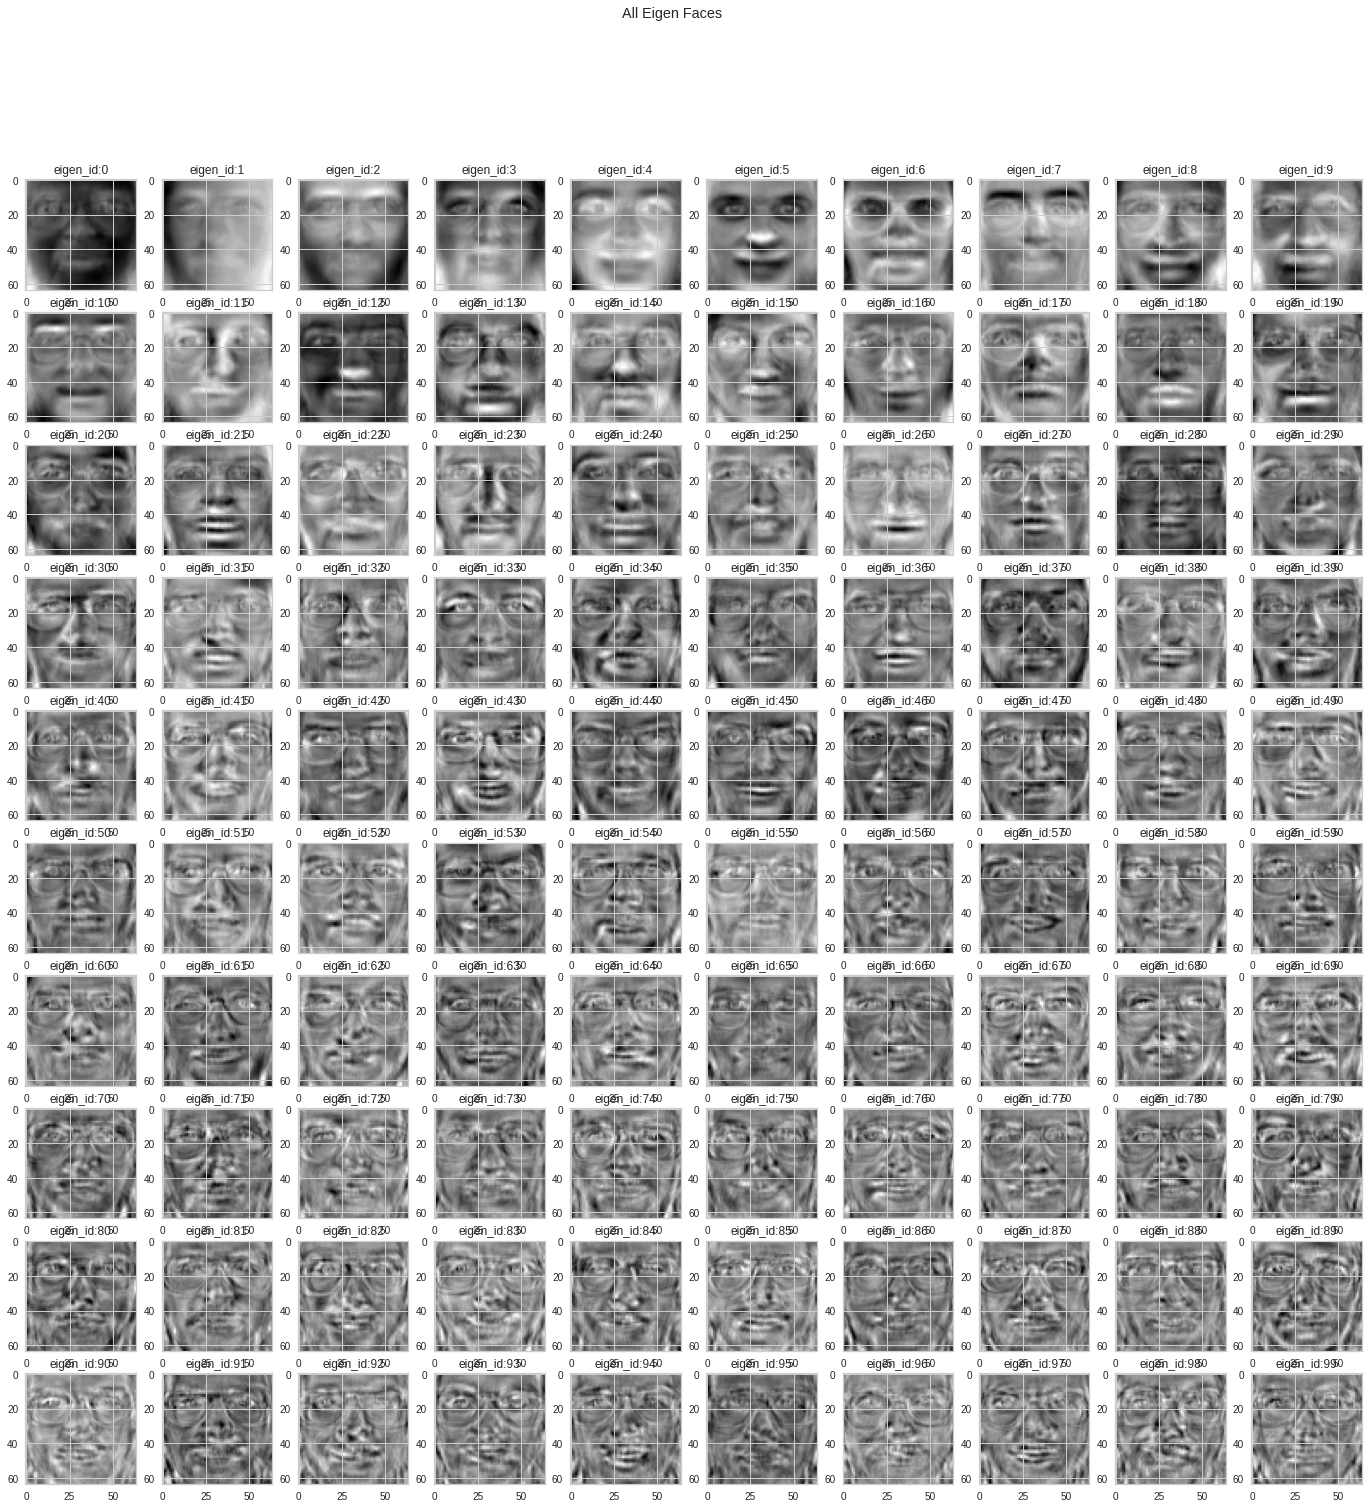

In [ ]:
# eigenfaces of the sample

number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape(number_of_eigenfaces, faces.images[0].shape[0], faces.images[0].shape[1])

columns=10
rows=int(number_of_eigenfaces/columns)
fig, axarr=plt.subplots(nrows=rows, ncols=columns, figsize=(24,24))
axarr=axarr.flatten()
for i in range(number_of_eigenfaces):
    axarr[i].imshow(eigen_faces[i],cmap="gray")

    axarr[i].set_title("eigen_id:{}".format(i))
plt.suptitle("All Eigen Faces".format(10*"=", 10*"="))